In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# DATASET Exploration

## Dataset Reading

In [2]:
df_energy = pd.read_csv('dataset/energy_dataset.csv')
df_weather = pd.read_csv('dataset/weather_features.csv')

## Weather dataset

In [3]:
df_weather.head(10)

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
5,2015-01-01 05:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
6,2015-01-01 06:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
7,2015-01-01 07:00:00+01:00,Valencia,270.292,270.292,270.292,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
8,2015-01-01 08:00:00+01:00,Valencia,274.601,274.601,274.601,1005,71,1,307,0.0,0.0,0.0,0,800,clear,sky is clear,01d
9,2015-01-01 09:00:00+01:00,Valencia,274.601,274.601,274.601,1005,71,1,307,0.0,0.0,0.0,0,800,clear,sky is clear,01d


### Description of the columns --> DA SISTEMARE
- dt_iso = data e ora compresa di fuso orario
- city_name = nome città
- temp = temperatura media misurata in Kelvin
- temp_min = temperatura minima misurata in Kelvin
- temp_max = temperatura massima misurata in Kelvin
- pressure = pressione misurata in Pascal
- humidity = umidità
- wind_speed = velocità del vento
- wind_deg = direzione del vento
- rain_1h = mm di acqua piovuta nell'ultima ora
- rain_3h = mm di acqua piovuta nelle ultime 3 ore
- snow_3h = mm di neve caduti nelle ultime 3 ore
- clouds_all = nuvole in cielo
- weather_id = codice che indica il tempo
- weather_main = nome associato al codice
- weather_description = descrizione del tempo
- weather_icon =

In [4]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

We have to parse 'dt_iso' correctly and actually rename it as 'time' so that it matches with the index of df_energy.

In [5]:
df_weather['dt_iso'] = pd.to_datetime(df_weather['dt_iso'], utc=True, infer_datetime_format=True)
df_weather.rename(columns={'dt_iso': 'time'}, inplace=True)

/var/folders/by/v4h5_dq95n7cx3hgn79x_5nr0000gn/T/ipykernel_5091/2899516411.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_weather['dt_iso'] = pd.to_datetime(df_weather['dt_iso'], utc=True, infer_datetime_format=True)


In [6]:
df_weather.describe().round(4)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.0000,178396.0000,178396.0000,1.783960e+05,178396.0000,178396.0000,178396.0000,178396.0000,178396.0000,178396.0000,178396.0000,178396.0000
mean,289.6186,288.3304,291.0913,1.069261e+03,68.4235,2.4706,166.5912,0.0755,0.0004,0.0048,25.0733,759.8319
std,8.0262,7.9555,8.6125,5.969632e+03,21.9029,2.0959,116.6119,0.3988,0.0073,0.2226,30.7741,108.7332
min,262.2400,262.2400,262.2400,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,200.0000
25%,283.6700,282.4836,284.6500,1.013000e+03,53.0000,1.0000,55.0000,0.0000,0.0000,0.0000,0.0000,800.0000
50%,289.1500,288.1500,290.1500,1.018000e+03,72.0000,2.0000,177.0000,0.0000,0.0000,0.0000,20.0000,800.0000
75%,295.1500,293.7301,297.1500,1.022000e+03,87.0000,4.0000,270.0000,0.0000,0.0000,0.0000,40.0000,801.0000
max,315.6000,315.1500,321.1500,1.008371e+06,100.0000,133.0000,360.0000,12.0000,2.3150,21.5000,100.0000,804.0000


We should note that the temperatures are in Kelvin. So to better understand the date we decided to change in Celsius.

In [7]:
df_weather["temp_Celsius"] = df_weather.temp - 273.15
df_weather["temp_min_Celsius"] = df_weather.temp_min - 273.15
df_weather["temp_max_Celsius"] = df_weather.temp_max - 273.15
df_weather.drop(columns = ['temp', 'temp_min', 'temp_max'], inplace = True)

In [8]:
new_column_order = ['city_name', 'time', 'temp_Celsius', 'temp_min_Celsius', 'temp_max_Celsius',
                    'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h','clouds_all',
                    'weather_id', 'weather_main', 'weather_description','weather_icon']
df_weather = df_weather.reindex(columns = new_column_order)
df_weather

,city_name,time,temp_Celsius,temp_min_Celsius,temp_max_Celsius,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,Valencia,2014-12-31 23:00:00+00:00,-2.675,-2.675,-2.675,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,Valencia,2015-01-01 00:00:00+00:00,-2.675,-2.675,-2.675,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,Valencia,2015-01-01 01:00:00+00:00,-3.464,-3.464,-3.464,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,Valencia,2015-01-01 02:00:00+00:00,-3.464,-3.464,-3.464,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,Valencia,2015-01-01 03:00:00+00:00,-3.464,-3.464,-3.464,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,Seville,2018-12-31 18:00:00+00:00,14.610,14.000,15.000,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,Seville,2018-12-31 19:00:00+00:00,12.610,12.000,13.000,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,Seville,2018-12-31 20:00:00+00:00,12.000,12.000,12.000,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,Seville,2018-12-31 21:00:00+00:00,11.000,11.000,11.000,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [9]:
df_weather.describe().round(4)

,temp_Celsius,temp_min_Celsius,temp_max_Celsius,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.0000,178396.0000,178396.0000,1.783960e+05,178396.0000,178396.0000,178396.0000,178396.0000,178396.0000,178396.0000,178396.0000,178396.0000
mean,16.4686,15.1804,17.9413,1.069261e+03,68.4235,2.4706,166.5912,0.0755,0.0004,0.0048,25.0733,759.8319
std,8.0262,7.9555,8.6125,5.969632e+03,21.9029,2.0959,116.6119,0.3988,0.0073,0.2226,30.7741,108.7332
min,-10.9100,-10.9100,-10.9100,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,200.0000
25%,10.5200,9.3336,11.5000,1.013000e+03,53.0000,1.0000,55.0000,0.0000,0.0000,0.0000,0.0000,800.0000
50%,16.0000,15.0000,17.0000,1.018000e+03,72.0000,2.0000,177.0000,0.0000,0.0000,0.0000,20.0000,800.0000
75%,22.0000,20.5801,24.0000,1.022000e+03,87.0000,4.0000,270.0000,0.0000,0.0000,0.0000,40.0000,801.0000
max,42.4500,42.0000,48.0000,1.008371e+06,100.0000,133.0000,360.0000,12.0000,2.3150,21.5000,100.0000,804.0000


Here, we can see that all columns of df_weather have the same number of rows; we still have to check what is the case for each city individually, though. 
 The most important thing to notice is that there are some **problems** and **outliers**.

There are some problems with:
- the pressure column
- the wind column

Visualize the average values for each column, grouped by each city (note that the 'weather_id' average has no meaning whatsoever)

In [10]:
mean_weather_without_time = df_weather.drop(columns = ['time', 'weather_description', 'weather_main', 'weather_icon'])
mean_weather_by_city = mean_weather_without_time.groupby('city_name').mean()
mean_weather_by_city

,temp_Celsius,temp_min_Celsius,temp_max_Celsius,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
city_name,,,,,,,,,,,,
Barcelona,16.698248,15.444704,17.871987,1284.010486,73.994221,2.786588,187.188043,0.117079,0.000327,0.000000,23.229648,760.917465
Bilbao,13.228489,11.766661,14.886687,1017.567439,79.089455,1.957470,159.883536,0.123493,0.001034,0.023455,43.960697,723.943228
Madrid,14.911071,13.674877,16.005600,1011.838448,59.776932,2.441696,173.293159,0.055083,0.000129,0.000029,22.397028,762.260264
Seville,19.955431,18.034103,22.812431,1018.504711,64.140732,2.483787,151.757179,0.045392,0.000180,0.000000,14.748770,771.409849
Valencia,17.630780,17.072277,18.205025,1015.973794,65.145113,2.692815,160.753820,0.035924,0.000226,0.000154,20.820999,781.228283


Since, df_weather contains information about 5 different cities, it is very useful to display the number of observations for each one and compare it with the size of df_energy.

In [11]:
# Find duplicates in df_weather

print('There are {} observations in df_energy.'.format(df_energy.shape[0]))

city_unique = df_weather.city_name.unique()
grouped_weather = df_weather.groupby('city_name')

for city in city_unique:
    print('There are', format(grouped_weather.get_group('{}'.format(city)).shape[0]),'observations in df_weather about city:', city)

There are 35064 observations in df_energy.
There are 35145 observations in df_weather about city: Valencia
There are 36267 observations in df_weather about city: Madrid
There are 35951 observations in df_weather about city: Bilbao
There are 35476 observations in df_weather about city:  Barcelona
There are 35557 observations in df_weather about city: Seville


In this way the two dataset cannot be mearged yet. There are many duplicates for every city in df_weather and we should drop them and see if their number of rows match. We do this by resetting the index, keeping only the first rows which have the same 'time' and 'city_name' values and then setting again 'time' as the index. For further research on the dataset, let us also create a second dataframe, df_weather_2 in which we do the same procedure, but keep only the last rows which have the same 'time' and 'city_name'.

In [12]:
df_weather2 = df_weather.drop_duplicates(subset=['time', 'city_name'], keep='last')

df_weather = df_weather.drop_duplicates(subset=['time', 'city_name'], keep='first')

In [13]:
# Display the number of rows for each city again

print('There are {} observations in df_energy.'.format(df_energy.shape[0]))

for city in city_unique:
    print('There are', format(grouped_weather.get_group('{}'.format(city)).shape[0]),'observations in df_weather about city:', city)

There are 35064 observations in df_energy.
There are 35145 observations in df_weather about city: Valencia
There are 36267 observations in df_weather about city: Madrid
There are 35951 observations in df_weather about city: Bilbao
There are 35476 observations in df_weather about city:  Barcelona
There are 35557 observations in df_weather about city: Seville


The column 'weather_icon' is irrelevant for our analysis, so we will drop it. Furthermore, the columns 'weather_main' and 'weather_description' contain approximately the same information as the column 'weather_id'; the information concerns a qualitative description of the weather at the given hour. So, we will work with only one of them. However, in order to make a choice, we have to check the unique values as well as the consistency of each column.

In [14]:
weather_description_unique = df_weather.weather_description.unique()
weather_description_unique

array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain',
       'heavy intensity rain', 'mist', 'heavy intensity shower rain',
       'shower rain', 'very heavy rain', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'proximity thunderstorm',
       'thunderstorm', 'light intensity shower rain',
       'light intensity drizzle', 'thunderstorm with rain', 'fog',
       'smoke', 'drizzle', 'heavy intensity drizzle', 'haze',
       'proximity shower rain', 'light snow', 'rain and snow',
       'light rain and snow', 'snow', 'sleet', 'rain and drizzle',
       'light intensity drizzle rain', 'light shower snow',
       'proximity moderate rain', 'ragged shower rain', 'heavy snow',
       'sand dust whirls', 'proximity drizzle', 'dust',
       'light thunderstorm', 'squalls'], dtype=object)

In [15]:
weather_main_unique = df_weather.weather_main.unique()
weather_main_unique

array(['clear', 'clouds', 'rain', 'mist', 'thunderstorm', 'drizzle',
       'fog', 'smoke', 'haze', 'snow', 'dust', 'squall'], dtype=object)

In [16]:
weather_id_unique = df_weather.weather_id.unique()
weather_id_unique

array([800, 801, 802, 803, 804, 500, 501, 502, 701, 522, 521, 503, 202,
       200, 211, 520, 300, 201, 741, 711, 301, 302, 721, 600, 616, 615,
       601, 611, 311, 310, 620, 531, 602, 731, 761, 210, 771])

In [17]:
# Define a function which will calculate R-squared score for the same column in our two datasets

def encode_and_display_r2_score(dataset1, dataset2, column, categorical = False):
    datasets = [dataset1, dataset2]
    if categorical:
        for df in datasets:
            label_encoder = LabelEncoder()
            df.loc[:, column] = label_encoder.fit_transform(df[column])
    r2 = r2_score(dataset1[column], dataset2[column])
    print("R-Squared score of", column, "is", r2)

In [18]:
encode_and_display_r2_score(df_weather, df_weather2, 'weather_description', categorical = True)
encode_and_display_r2_score(df_weather, df_weather2, 'weather_main', categorical = True)
encode_and_display_r2_score(df_weather, df_weather2, 'weather_id')

R-Squared score of weather_description is 0.972978840026219
R-Squared score of weather_main is 0.9627152451498913
R-Squared score of weather_id is 0.9205784928822044


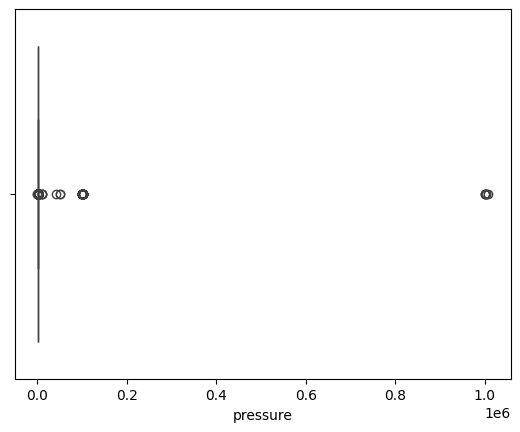

In [19]:
# Check for outliers in 'pressure' column

sns.boxplot(x=df_weather['pressure'])
plt.show()

In [20]:
pressure_mask = df_weather.pressure > 800000
df_weather[pressure_mask]

,city_name,time,temp_Celsius,temp_min_Celsius,temp_max_Celsius,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
108589,Barcelona,2015-02-21 01:00:00+00:00,10.10,10.10,10.10,1008371,0,3,337,12.0,0.0,0.0,12,503,7,40,10n
108596,Barcelona,2015-02-21 08:00:00+00:00,10.90,10.90,10.90,1001781,0,9,292,0.0,0.0,0.0,92,804,1,20,04d
108597,Barcelona,2015-02-21 09:00:00+00:00,10.90,10.90,10.90,1001501,0,2,337,0.0,0.0,0.0,92,804,1,20,04d
108598,Barcelona,2015-02-21 10:00:00+00:00,1.50,1.50,1.50,1000951,0,2,337,0.3,0.0,0.0,92,500,7,13,10d
108618,Barcelona,2015-02-22 06:00:00+00:00,6.72,6.72,6.72,1002241,0,0,0,0.0,0.0,0.0,0,800,0,31,01n
108619,Barcelona,2015-02-22 07:00:00+00:00,8.60,8.60,8.60,1002881,0,1,22,0.0,0.0,0.0,0,800,0,31,01d


In [37]:
df_weather_Barcelona = df_weather[df_weather['city_name'] == ' Barcelona']
time_mask = (df_weather_Barcelona['time'] > '2015-02-15 01:00:00+00:00') & (df_weather_Barcelona['time'] < '2015-02-28 01:00:00+00:00')

pressure_control = df_weather_Barcelona[time_mask]

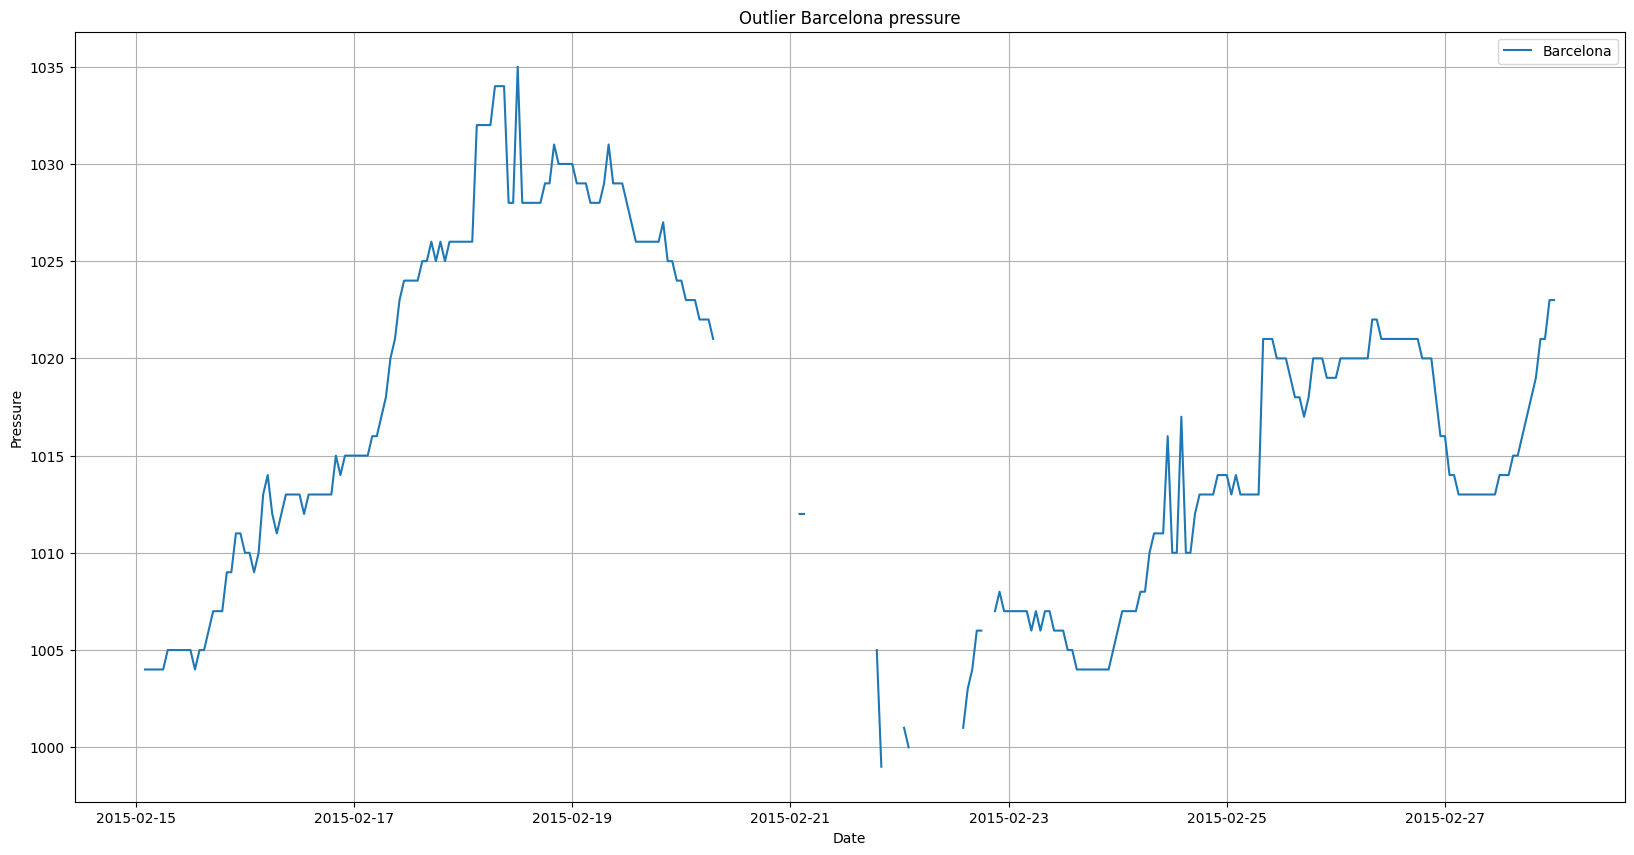

In [38]:
# Plot of the strange value in the pressure

plt.figure(figsize=(20, 10))
plt.plot(pressure_control['time'], pressure_control['pressure'], label='Barcelona')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.title('Outlier Barcelona pressure')

plt.legend()
plt.grid(True)
plt.show()

In [39]:
df_weather.loc[df_weather.pressure > 1051, 'pressure'] = np.nan
df_weather.loc[df_weather.pressure < 931, 'pressure'] = np.nan

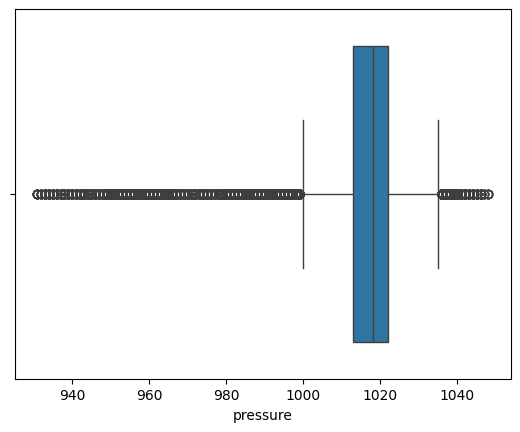

In [40]:
# Check for outliers in 'pressure' column

sns.boxplot(x=df_weather['pressure'])
plt.show()

In [41]:
df_weather_Barcelona = df_weather[df_weather['city_name'] == ' Barcelona']
time_mask = (df_weather_Barcelona['time'] > '2015-02-15 01:00:00+00:00') & (df_weather_Barcelona['time'] < '2015-02-28 01:00:00+00:00')

pressure_control = df_weather_Barcelona[time_mask]

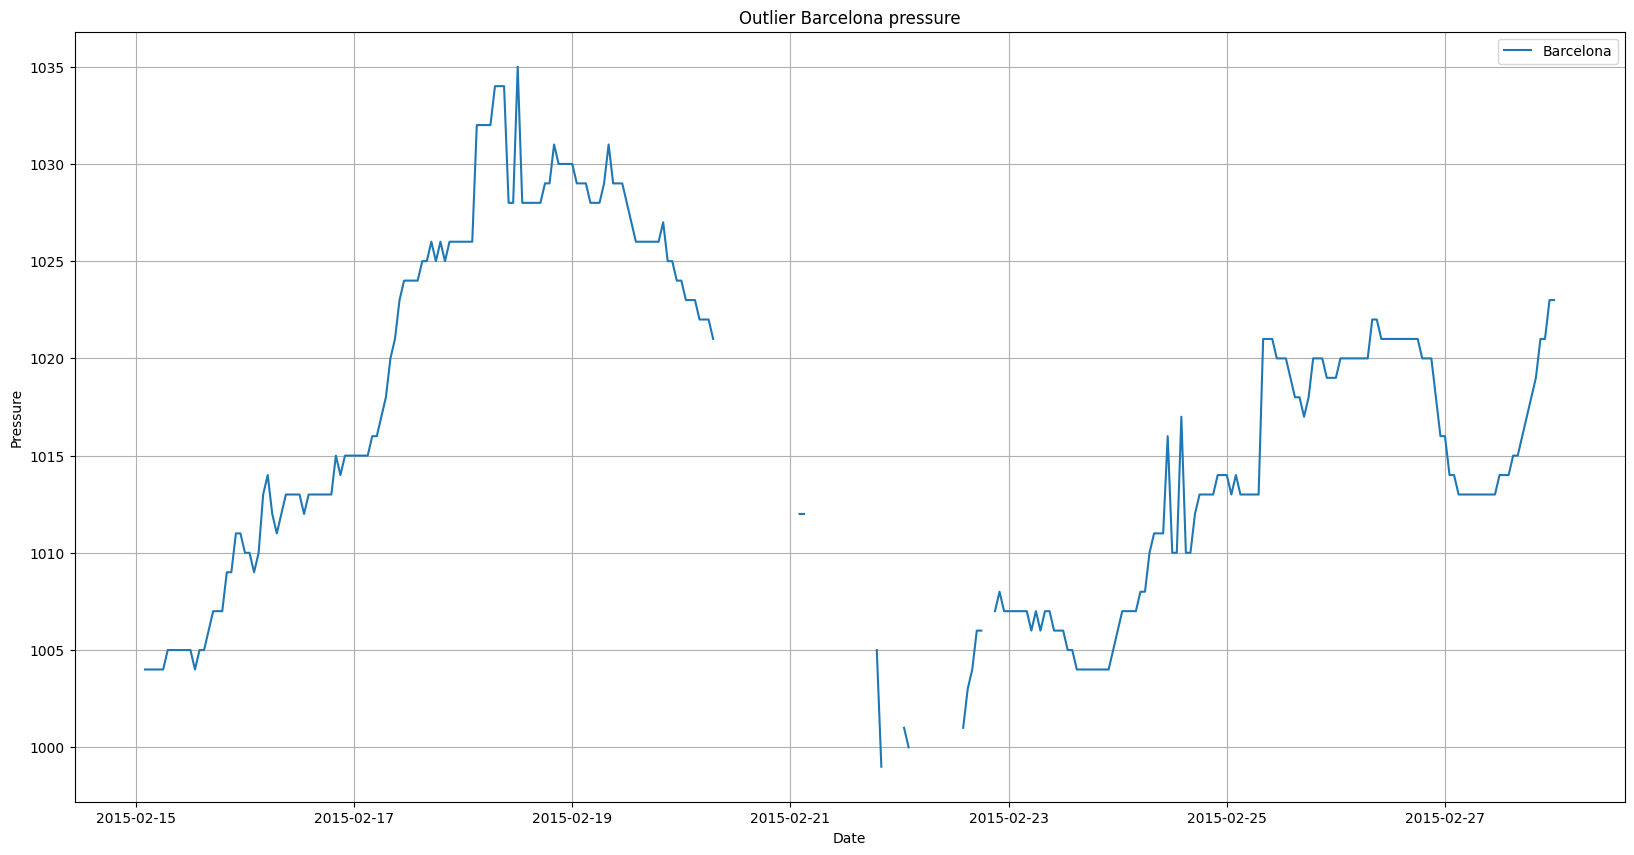

In [42]:
plt.figure(figsize=(20, 10))
plt.plot(pressure_control['time'], pressure_control['pressure'], label='Barcelona')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.title('Outlier Barcelona pressure')

plt.legend()
plt.grid(True)
plt.show()

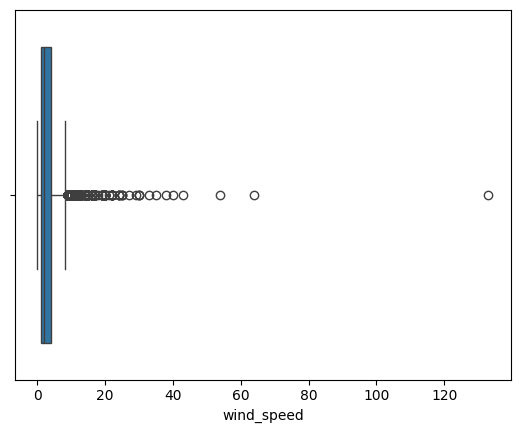

In [43]:
# Check for outliers in 'wind_speed' column

sns.boxplot(x=df_weather['wind_speed'])
plt.show()

La velocità del vento di un tifone è di solito intorno ai 40 metri al secondo, che corrisponde a circa 190 chilogrammi per metro quadrato. L'elenco di conversione del livello del vento, della velocità del vento e della pressione del vento è mostrato nella tabella.

In [28]:
wind_mask = df_weather.wind_speed > 50
df_weather[wind_mask]

,city_name,time,temp_Celsius,temp_min_Celsius,temp_max_Celsius,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
708,Valencia,2015-01-30 10:00:00+00:00,16.6,16.6,16.6,997.0,62,64,314,0.0,0.0,0.0,0,800,0,31,01d
712,Valencia,2015-01-30 14:00:00+00:00,17.8,17.8,17.8,993.0,58,54,262,0.0,0.0,0.0,0,800,0,31,01d
20725,Valencia,2017-05-11 10:00:00+00:00,20.0,20.0,20.0,1002.0,52,133,20,0.0,0.0,0.0,20,801,1,3,02d


In [47]:
df_weather_Valencia = df_weather[df_weather['city_name'] == 'Valencia']
time_mask1 = (df_weather_Valencia['time'] > '2015-01-29 10:00:00+00:00') & (df_weather_Valencia['time'] < '2015-01-31 10:00:00+00:00')
time_mask2 = (df_weather_Valencia['time'] > '2017-05-10 10:00:00+00:00') & (df_weather_Valencia['time'] < '2017-05-12 10:00:00+00:00')

wind_control1 = df_weather_Valencia[time_mask1]
wind_control2 = df_weather_Valencia[time_mask2]

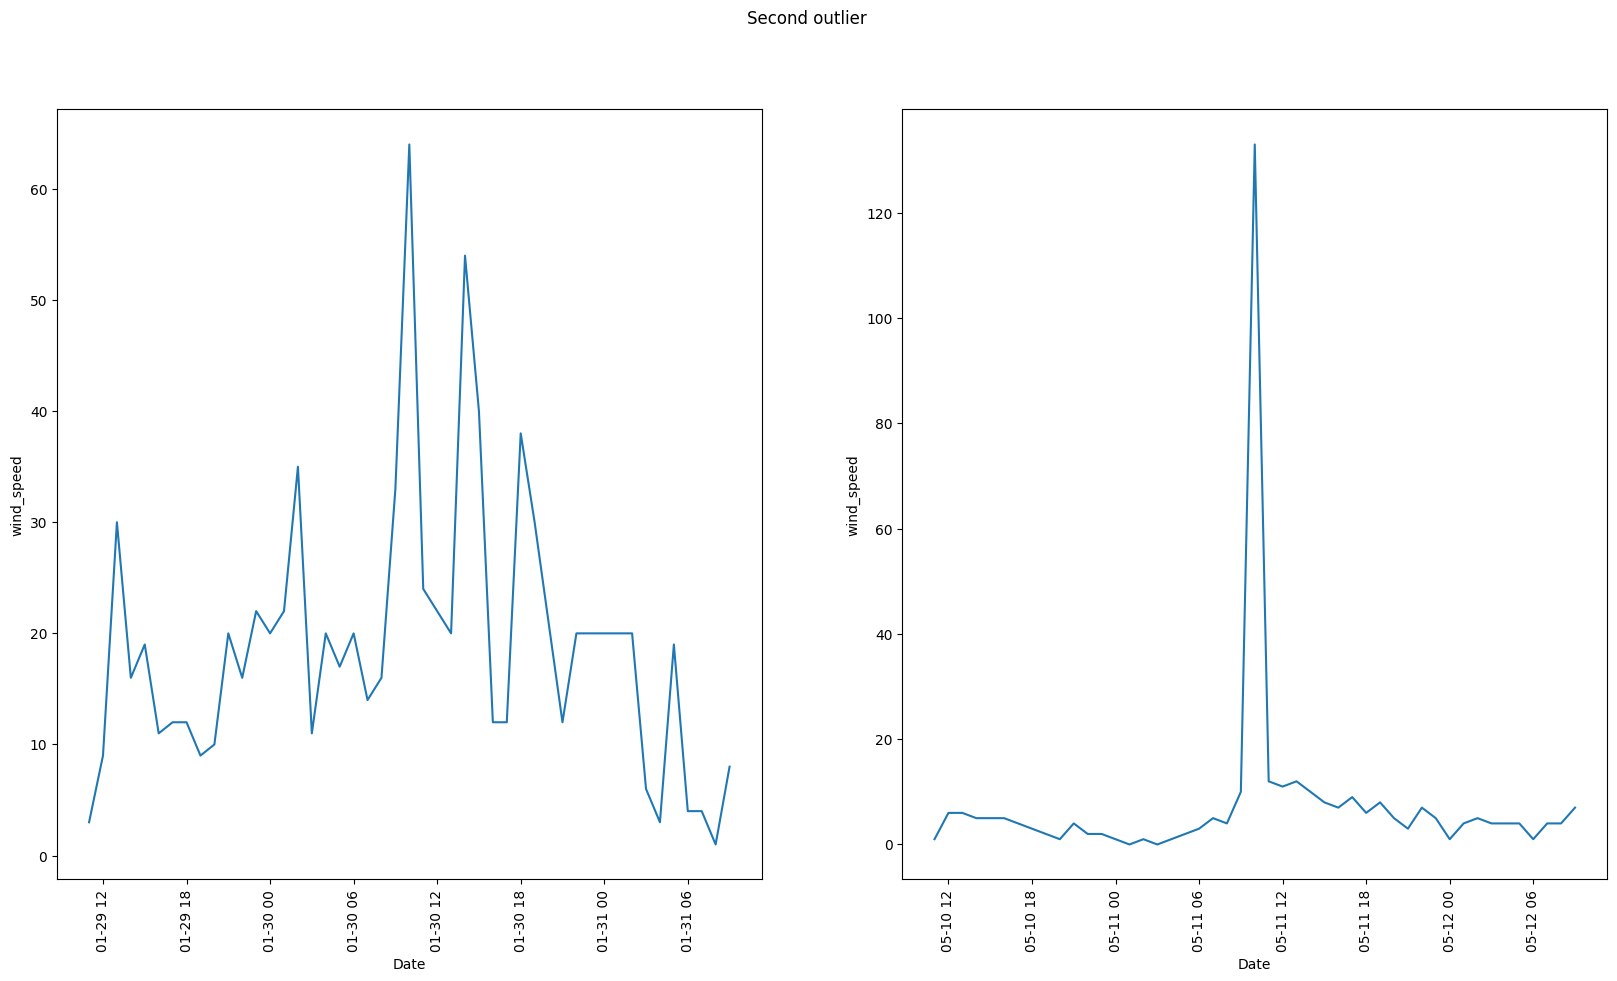

In [48]:
# Plot of the strange value in the wind_speed

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].plot(wind_control1['time'], wind_control1['wind_speed'], label='Valencia')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('wind_speed')
axs[0].tick_params(axis='x', rotation=90)
fig.suptitle('First outlier')

axs[1].plot(wind_control2['time'], wind_control2['wind_speed'], label='Valencia')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('wind_speed')
axs[1].tick_params(axis='x', rotation=90)
fig.suptitle('Second outlier')

plt.show()  

In [51]:
df_weather.loc[df_weather.wind_speed > 40, 'wind_speed'] = np.nan

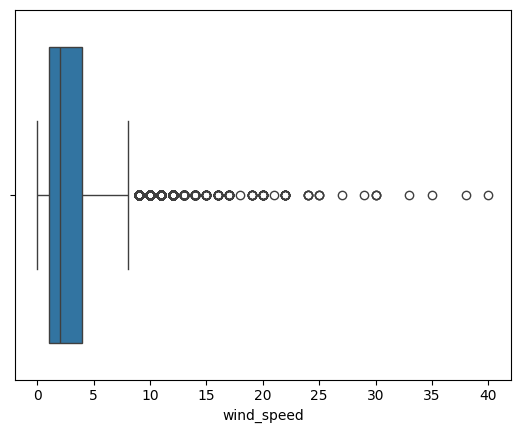

In [52]:
# Check for outliers in 'wind_speed' column

sns.boxplot(x=df_weather['wind_speed'])
plt.show()

In [53]:
df_weather_Valencia = df_weather[df_weather['city_name'] == 'Valencia']
time_mask1 = (df_weather_Valencia['time'] > '2015-01-29 10:00:00+00:00') & (df_weather_Valencia['time'] < '2015-01-31 10:00:00+00:00')
time_mask2 = (df_weather_Valencia['time'] > '2017-05-10 10:00:00+00:00') & (df_weather_Valencia['time'] < '2017-05-12 10:00:00+00:00')

wind_control1 = df_weather_Valencia[time_mask1]
wind_control2 = df_weather_Valencia[time_mask2]

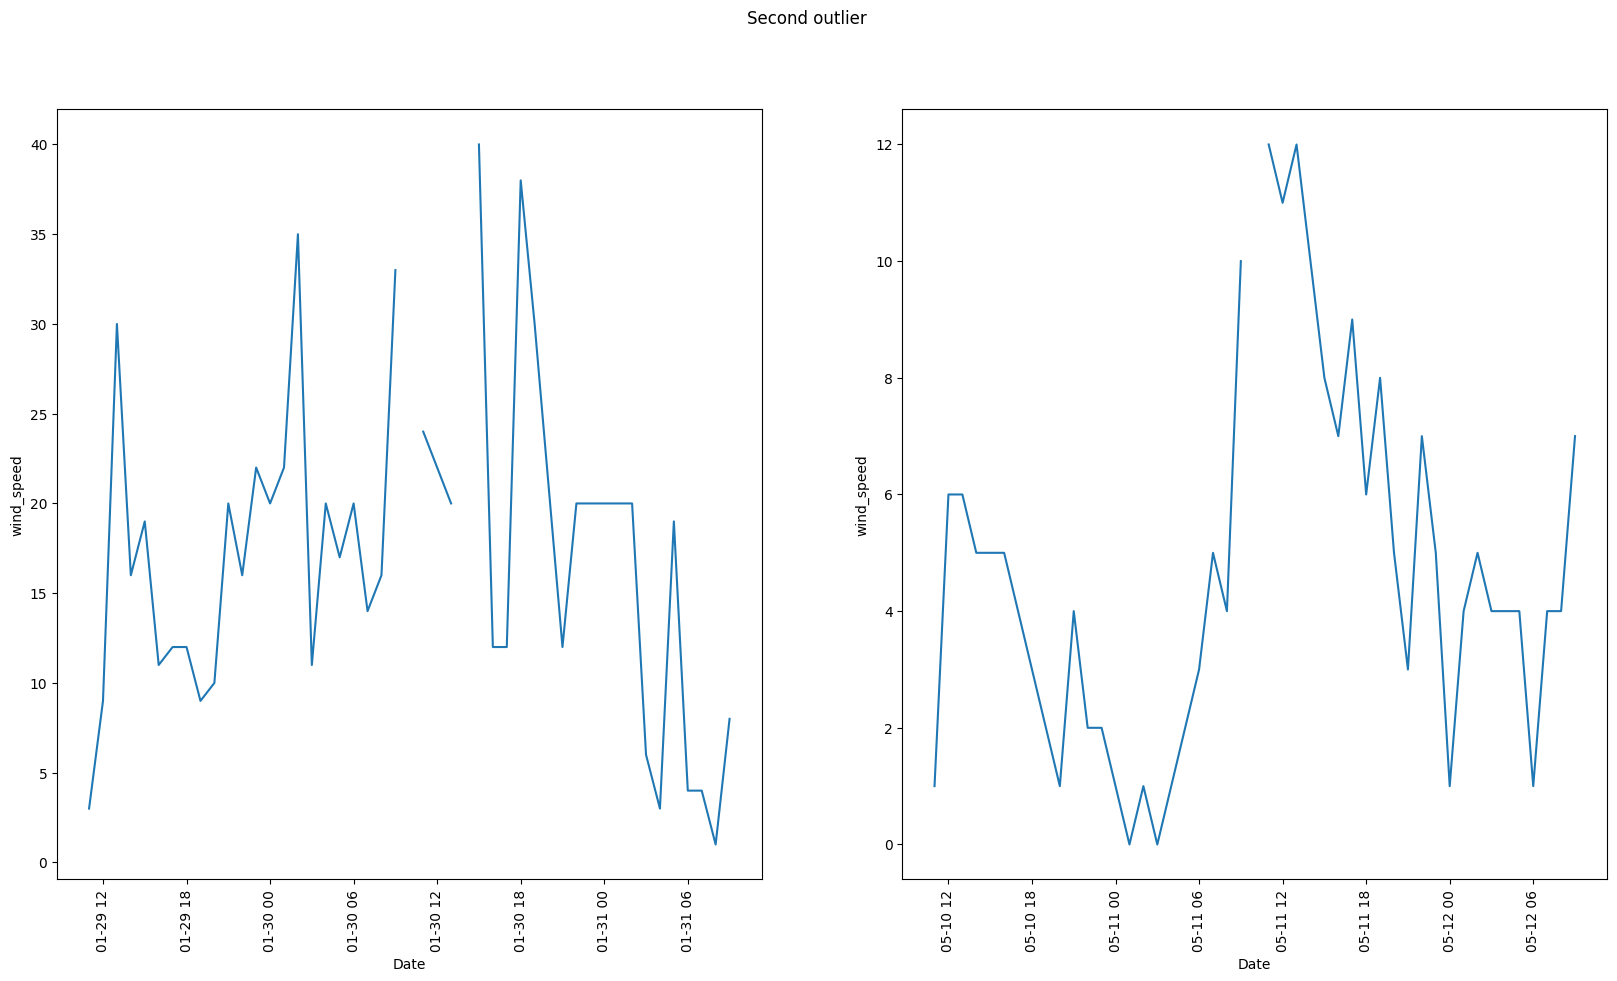

In [54]:
# Plot of the strange value in the wind_speed

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].plot(wind_control1['time'], wind_control1['wind_speed'], label='Valencia')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('wind_speed')
axs[0].tick_params(axis='x', rotation=90)

axs[1].plot(wind_control2['time'], wind_control2['wind_speed'], label='Valencia')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('wind_speed')
axs[1].tick_params(axis='x', rotation=90)
fig.suptitle('Second outlier')

plt.show()  